In [1]:
# in first step, calling related libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', 100)

In [2]:
# lets import our fist dataset
usr_review = pd.read_csv("googleplaystore_user_reviews.csv")
usr_df = pd.DataFrame(data=usr_review)
usr_df.head(1)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333


In [3]:
# now we import the second dataser:
app_data = pd.read_csv("googleplaystore.csv")
app_df = pd.DataFrame(data=app_data)
app_df.head(1)



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [4]:
len(usr_df) , len(app_df)

(64295, 10841)

# 1. Data Cleaning
#### * to avoid any error and having a meaningful Data Exploration, we must have a cleaned and well prepared data. so we do Data Cleaning at first and after that we explore the data

## 1.1. prepareting Datatypes


In [5]:
# first let's check Data Types of our dataframe columns
app_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

we have some problem here:

1. Data type of Rating, Reviews, Size, Installs, Price, must convert to numeric, these columns contain continuous values

    for this conversion :
    
    we must convert all app sizes to Megabytes and delete the K, M, G sings

    we must remove the $ sing from price column
    
2. we must create a new column named last Update Date, with data time datatype,
3. APP, Category, Type, Content Rating, Genres, Current Ver, Android Ver are *categorical data* and datatypes of them are fine.
4. It is better to rename Review column to total_reviews

In [6]:
app_df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [7]:
app_df.rename(columns={"Price": "Price_in$"}, inplace=True)
app_df.rename(columns={"Reviews": "Total_reviews"}, inplace=True)
app_df.rename(columns={"Content Rating": "Content_rating"}, inplace=True)
app_df.head(2)

,App,Category,Rating,Total_reviews,Size,Installs,Type,Price_in$,Content_rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


as you can see we have value "Varies with device" and this is not good, we must check how many rows have this value for size.

In [8]:
app_df["Size"].loc[app_df["Size"]=="Varies with device"].count()

1695

there are 1695 rows with value of "Varies with device", so we can not easly delete them, we must create a new dataframe without "Varies with device"
before that, let's clean out data in Price column and

In [9]:
app_df["Price_in$"] = app_df["Price_in$"].str.replace("$", "") 
app_df.head(3)

,App,Category,Rating,Total_reviews,Size,Installs,Type,Price_in$,Content_rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


#### from now on i will work on a new dataframe, named welltype_app_df all type conversions will be done on this new dataframe.
#### in any case, if we need data with out consideration of size, we will use other 1695 rows(rows containing "Varies with device" for size )

In [10]:
# to find out correlations of size and other variables, we must get rid of the value :"Varies with device" for size variable
welltype_app_df = app_df.loc[app_df["Size"] != "Varies with device"].copy()

# this line is making error messages, data is not Recorded properly.
welltype_app_df.loc[welltype_app_df["Size"] == "1,000+"]

,App,Category,Rating,Total_reviews,Size,Installs,Type,Price_in$,Content_rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
# let's remove this line,
welltype_app_df.drop(index=10472, inplace=True)

In [12]:


# correct datatype and scale of "Size" Variable. i prefer Megabytes for showing size of the apps.

welltype_app_df['Size'] = welltype_app_df['Size'].replace({'[Mm]': '', '[Kk]': '*0.001', '[Gg]': '*1000'}, regex=True, inplace=False ).map(pd.eval).astype(float)

# to delete + / - sings from install numbers
welltype_app_df['Installs'] = welltype_app_df['Installs'].str.replace("[+-,]", "", regex=True).map(pd.eval).astype(int)

welltype_app_df["Total_reviews"] = welltype_app_df['Total_reviews'].astype(int)


# convert price to float
welltype_app_df["Price_in$"] = welltype_app_df["Price_in$"].astype(float)

# i dont need Last Updated, Current Ver, Android Ver so i must remove them
welltype_app_df.drop(columns=["Last Updated","Current Ver","Android Ver"], inplace=True)
welltype_app_df.head(5)

,App,Category,Rating,Total_reviews,Size,Installs,Type,Price_in$,Content_rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


In [13]:
welltype_app_df.dtypes

App                object
Category           object
Rating            float64
Total_reviews       int32
Size              float64
Installs            int32
Type               object
Price_in$         float64
Content_rating     object
Genres             object
dtype: object

#### well all datatypes look good.

## 1.2. Handling NAN and Nule values

In [14]:
#  nan values
welltype_app_df.isna().sum()

App                  0
Category             0
Rating            1416
Total_reviews        0
Size                 0
Installs             0
Type                 0
Price_in$            0
Content_rating       0
Genres               0
dtype: int64

In [15]:
shape = welltype_app_df.shape
shape

(9145, 10)


```pythoh
f"Shape of welltype_app_df is (9145, 10)"
```
##### So around 1/9 of our datarows have NAN values, we can not delete them easily.
##### we must findout what is meaning of these NAN Values. Let's look at one of the following Applications
##### for example i checked "lesparticuliers.fr" App and as i guessed, there is no rating on this app.(until today!)
##### hit this link to check the application:
**https://play.google.com/store/search?q=Gold%20Quote%20-%20Gold.fr&c=apps**


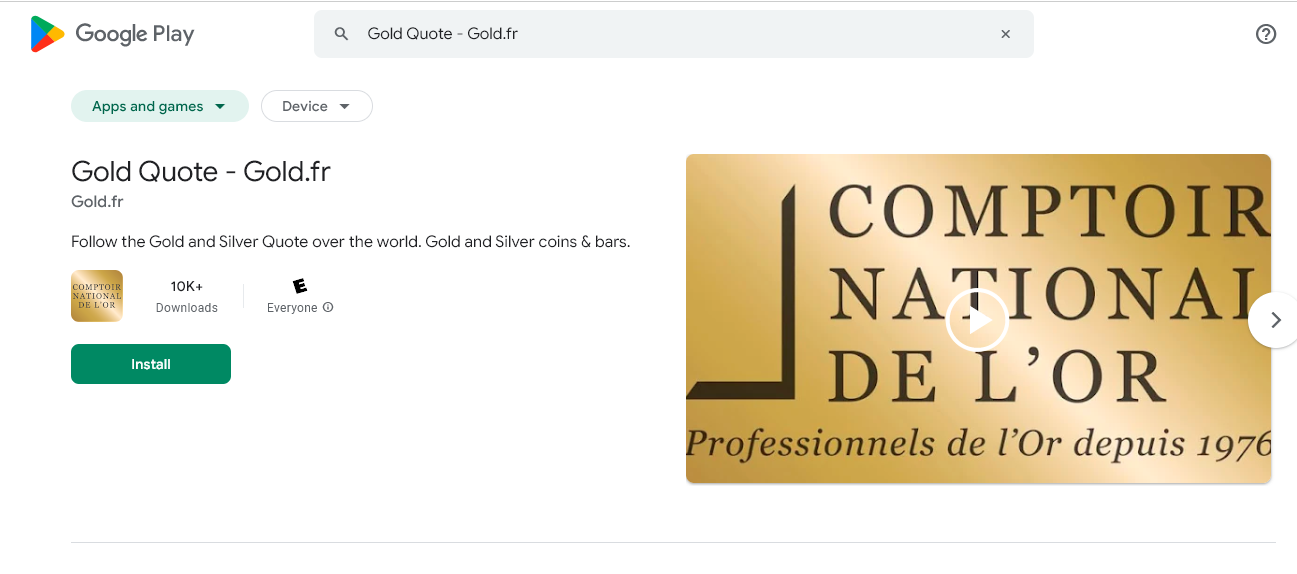



##### We generalization this condition to all NAN values. and put "0" to all NA values in our dataframe.

In [16]:
# we now change NAN to 0
welltype_app_df["Rating"].fillna(0, inplace=True)

C:\Users\saeed\AppData\Local\Temp\ipykernel_20752\376133705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  welltype_app_df["Rating"].fillna(0, inplace=True)


In [17]:
# let' check another time too see is there NAN value in welltype_app_df
welltype_app_df.isna().sum()

App               0
Category          0
Rating            0
Total_reviews     0
Size              0
Installs          0
Type              0
Price_in$         0
Content_rating    0
Genres            0
dtype: int64

##### NO :)) Every thing is Ok :))

## 1.3. Looking for Null values

In [18]:
welltype_app_df.isnull().sum()

App               0
Category          0
Rating            0
Total_reviews     0
Size              0
Installs          0
Type              0
Price_in$         0
Content_rating    0
Genres            0
dtype: int64

##### No, everything is ok:)))

## 1.4. Duplicate Rows


In [19]:
welltype_app_df

,App,Category,Rating,Total_reviews,Size,Installs,Type,Price_in$,Content_rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,0.0,0,9.6,10,Free,0.0,Everyone,Business
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5,1000,Free,0.0,Everyone,Medical


In [20]:
welltype_app_df = welltype_app_df.drop_duplicates(["App"])
welltype_app_df

,App,Category,Rating,Total_reviews,Size,Installs,Type,Price_in$,Content_rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,0.0,0,9.6,10,Free,0.0,Everyone,Business
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5,1000,Free,0.0,Everyone,Medical


In [21]:
welltype_app_df.loc[welltype_app_df.duplicated(subset='App', keep=False)]

,App,Category,Rating,Total_reviews,Size,Installs,Type,Price_in$,Content_rating,Genres


#### And a final look at out dataset could be helpful

In [22]:
welltype_app_df.describe()

,Rating,Total_reviews,Size,Installs,Price_in$
count,8434.000000,8.434000e+03,8434.000000,8.434000e+03,8434.000000
mean,3.467643,1.206578e+05,20.391473,3.724633e+06,1.225682
std,1.632294,9.362340e+05,21.826363,2.482656e+07,18.026557
min,0.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,3.500000,1.700000e+01,4.600000,1.000000e+03,0.000000
50%,4.200000,4.775000e+02,12.000000,5.000000e+04,0.000000
75%,4.500000,1.567850e+04,28.000000,1.000000e+06,0.000000
max,5.000000,4.489172e+07,100.000000,1.000000e+09,400.000000


In [23]:
welltype_app_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8434 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8434 non-null   object 
 1   Category        8434 non-null   object 
 2   Rating          8434 non-null   float64
 3   Total_reviews   8434 non-null   int32  
 4   Size            8434 non-null   float64
 5   Installs        8434 non-null   int32  
 6   Type            8434 non-null   object 
 7   Price_in$       8434 non-null   float64
 8   Content_rating  8434 non-null   object 
 9   Genres          8434 non-null   object 
dtypes: float64(3), int32(2), object(5)
memory usage: 658.9+ KB


# 2. Data Exploration

#### Let's Dive into data exploration using Seaborn, my goal is:
##### finding *outliers*, *distributions*, *correlations* and *varities* and *covarities*.

In [24]:
welltype_app_df

,App,Category,Rating,Total_reviews,Size,Installs,Type,Price_in$,Content_rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,0.0,0,9.6,10,Free,0.0,Everyone,Business
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5,1000,Free,0.0,Everyone,Medical


# 2.1. correlations
heatmap and pair plot


## 2.2 categorical vs continuous

##### Q1. What are top 0 most installed Categories?

In [25]:
grouped_by_genres = welltype_app_df.groupby(['Genres'], as_index=False).agg({'Installs': 'sum', 'Total_reviews': 'sum'}).sort_values("Installs", ascending=False)
grouped_by_genres.head(10)


,Genres,Installs,Total_reviews
6,Arcade,3299079153,98498452
0,Action,3025939040,130866273
105,Tools,2891094815,83580259
26,Casual,2055480730,93718642
35,Communication,1817943051,45902247
78,Photography,1493897655,38427227
50,Entertainment,1417459679,25757669
79,Productivity,1296312744,23237203
72,News & Magazines,1191005650,5956180
85,Racing,1181647320,46670135


C:\Users\saeed\AppData\Local\Temp\ipykernel_20752\1224279394.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)


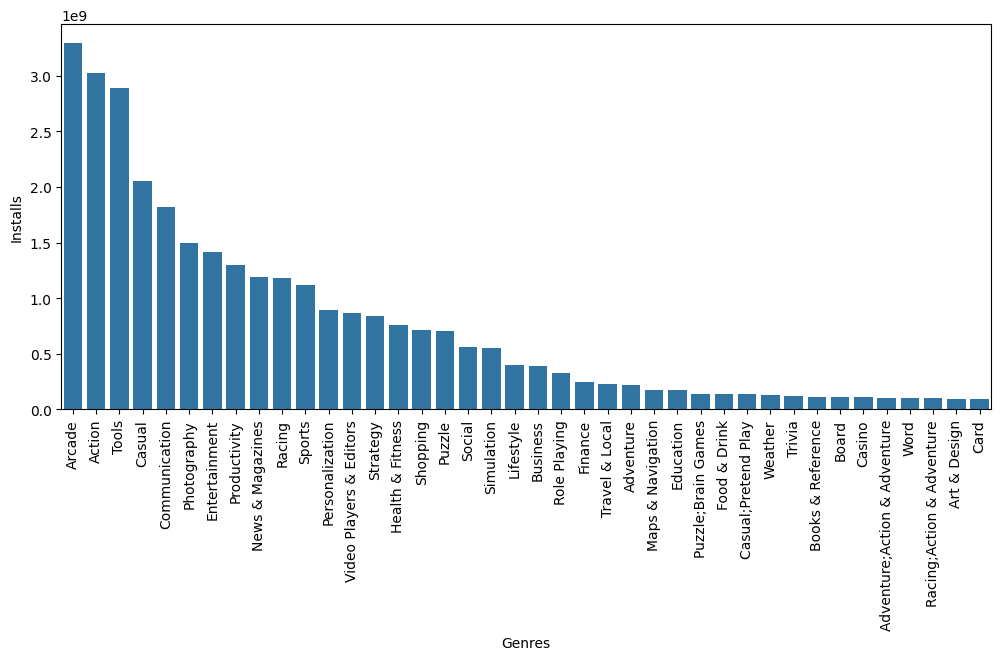

In [26]:
fig, ax = plt.subplots(figsize=(12, 5))
bar_plot = sns.barplot(data=grouped_by_genres.head(40),
            x="Genres",
            y="Installs",
            )
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)
plt.show()



##### this is a General view of the high installed Genres. what is going on for free and paid apps in these categories?
##### to avoid of chaos, i will just look at top 5 Genres

In [27]:
topfive_installed_categories = welltype_app_df.groupby(['Genres', "Type"], as_index=False).agg({'Installs': 'sum', 'Total_reviews': 'sum'}).sort_values("Installs", ascending=False)


topfive_Genres = list(grouped_by_genres.head(5).Genres)
spread_topfive =  topfive_installed_categories[topfive_installed_categories["Genres"].isin(topfive_Genres)]
spread_topfive

,Genres,Type,Installs,Total_reviews
10,Arcade,Free,3297641940,98377410
0,Action,Free,3008886790,129695823
167,Tools,Free,2890648474,83489329
43,Casual,Free,2055448560,93715312
56,Communication,Free,1817694001,45889194
1,Action,Paid,17052250,1170450
11,Arcade,Paid,1437213,121042
168,Tools,Paid,446341,90930
57,Communication,Paid,249050,13053
44,Casual,Paid,32170,3330


<Axes: xlabel='Genres', ylabel='Installs'>

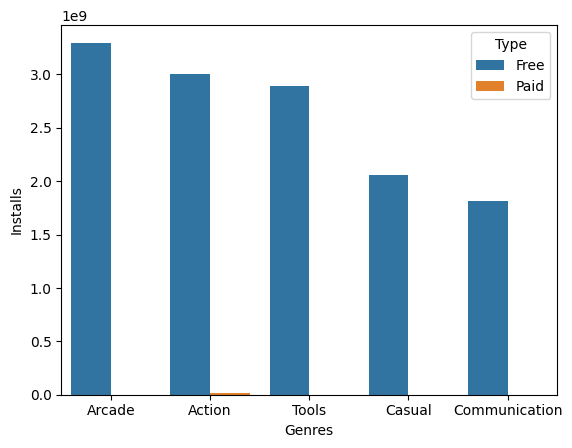

In [28]:
sns.barplot(spread_topfive, x="Genres", y="Installs", hue="Type")

##### Among the top 5 installed categories, the share of paid apps from the market is comparatively lower when compared to free apps.

## 2.3. continuous vs continuous

##### Q2. Size VS Rating: is there any relationship between size and rating?

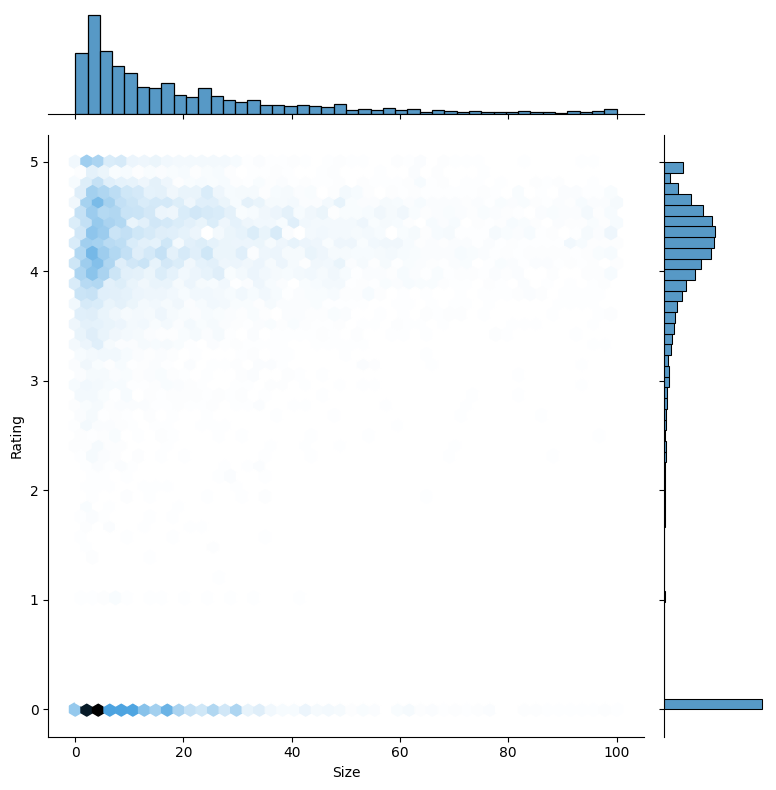

In [29]:
 
sns.jointplot(data=welltype_app_df,
              x="Size",
              y="Rating",
              kind="hex",
              
              height=8)

by looking at the jointplot (at hex and hist mode - in this case i prefer hex)


 **we can easily say apps with small size, have more chance to get high rates** by users.


### Q2.1 what are categories of most Rating and light size apps 


for answering this question we first need to select size interval and rating interval, we want to look at (**high rated - low size**) apps, by looking at jointplot we can understand both size and rating have left skewed distributions, so must use [median , mode] inreval for both size and rating.

In [30]:
non_zero_ratings = welltype_app_df.loc[welltype_app_df["Rating"] != 0 ] # to remove rating outliers

rating = non_zero_ratings.Rating
size = non_zero_ratings.Size



data = {"mean" : [rating.agg("mean").item(), size.agg("mean").item()], 
        "mode" : [rating.agg("mode").item(), size.agg("mode").item()], 
        "median" : [rating.agg("median").item(), size.agg("median").item()]}

info_df = pd.DataFrame(data=data , index=["Rating", "Size"])
info_df


,mean,mode,median
Rating,4.160777,4.4,4.3
Size,21.749461,14.0,13.0


##### in rating distribution difference between mean and mode is not too much. for Rating we can use [mean, mode] interval
##### in size we will use [median, mode] 

In [31]:
non_zero_ratings.head(2)

,App,Category,Rating,Total_reviews,Size,Installs,Type,Price_in$,Content_rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play


In [32]:
# [median, mode] 
size_condition =  (
    (non_zero_ratings.Size >= non_zero_ratings.Size.agg("median").item()) &
    (non_zero_ratings.Size <= non_zero_ratings.Size.agg("mode").item())
)


# [mean, mode]
rating_condition =  (
    (non_zero_ratings.Rating >= non_zero_ratings.Rating.agg("mean").item()) &
    (non_zero_ratings.Rating <= non_zero_ratings.Rating.agg("mode").item())
)


# select rows from dataframe
non_zero_ratings[rating_condition & size_condition].head()

,App,Category,Rating,Total_reviews,Size,Installs,Type,Price_in$,Content_rating,Genres
154,Offline English Dictionary,BOOKS_AND_REFERENCE,4.2,860,13.0,100000,Free,0.0,Everyone,Books & Reference
237,Zenefits,BUSINESS,4.2,296,14.0,50000,Free,0.0,Everyone,Business
388,Calls & Text by Mo+,COMMUNICATION,4.2,83239,14.0,5000000,Free,0.0,Everyone,Communication
432,PHONE for Google Voice & GTalk,COMMUNICATION,4.3,72065,13.0,1000000,Free,0.0,Everyone,Communication
435,Hiya - Caller ID & Block,COMMUNICATION,4.4,177703,13.0,10000000,Free,0.0,Mature 17+,Communication


##### There are 83 apps which are Low size and high rated. i want to look at categories of these 83 app.

In [33]:
lowsize_highrated = non_zero_ratings[rating_condition & size_condition].copy()
lowsize_highrated.groupby("Category", as_index=False).count()


,Category,App,Rating,Total_reviews,Size,Installs,Type,Price_in$,Content_rating,Genres
0,BOOKS_AND_REFERENCE,1,1,1,1,1,1,1,1,1
1,BUSINESS,3,3,3,3,3,3,3,3,3
2,COMMUNICATION,4,4,4,4,4,4,4,4,4
3,DATING,1,1,1,1,1,1,1,1,1
4,EDUCATION,1,1,1,1,1,1,1,1,1
5,FAMILY,14,14,14,14,14,14,14,14,14
6,FINANCE,2,2,2,2,2,2,2,2,2
7,GAME,7,7,7,7,7,7,7,7,7
8,HEALTH_AND_FITNESS,2,2,2,2,2,2,2,2,2
9,LIFESTYLE,4,4,4,4,4,4,4,4,4


In [34]:
df = lowsize_highrated.groupby("Category", as_index=False).count().sort_values(by="App", ascending=True)
fig = px.pie(df, values='App', names='Category', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

there is a interesting fact, look at this plot:

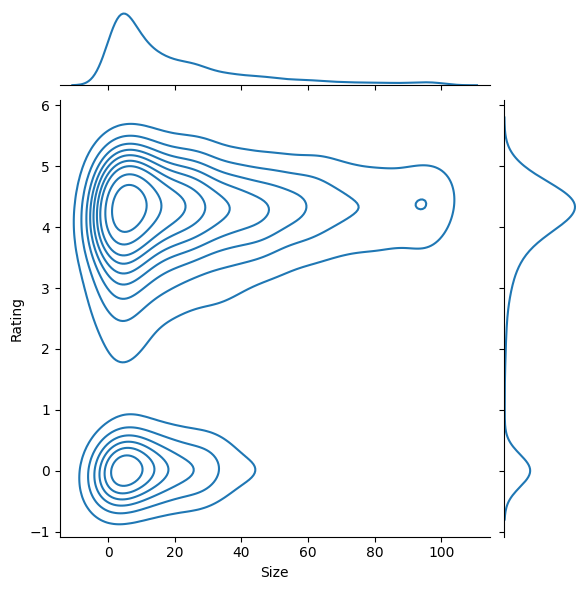

In [35]:
sns.jointplot(data=welltype_app_df,
                x="Size",
                y="Rating",
                kind="kde")

it is obvious there two kernel of population, so outliers are not useless. a good question is why they became outliers?

#### As you can see there are some outliers in the Rating
Let's find out which data points are outliers and what are their features?
what is categories and so on...

##### Q3. is there any relationship between Variables for paid apps?

In [36]:
welltype_app_df.head()

,App,Category,Rating,Total_reviews,Size,Installs,Type,Price_in$,Content_rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


#### for paid apps:


In [37]:
paid_app = welltype_app_df.loc[welltype_app_df["Type"] == "Paid"].copy()
paid_app.head()

,App,Category,Rating,Total_reviews,Size,Installs,Type,Price_in$,Content_rating,Genres
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.800,100000,Paid,4.99,Everyone,Business
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.000,100000,Paid,4.99,Everyone,Business
477,Calculator,DATING,2.6,57,6.200,1000,Paid,6.99,Everyone,Dating
478,Truth or Dare Pro,DATING,0.0,0,20.000,50,Paid,1.49,Teen,Dating
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,0.0,0,0.018,100,Paid,2.99,Everyone,Dating


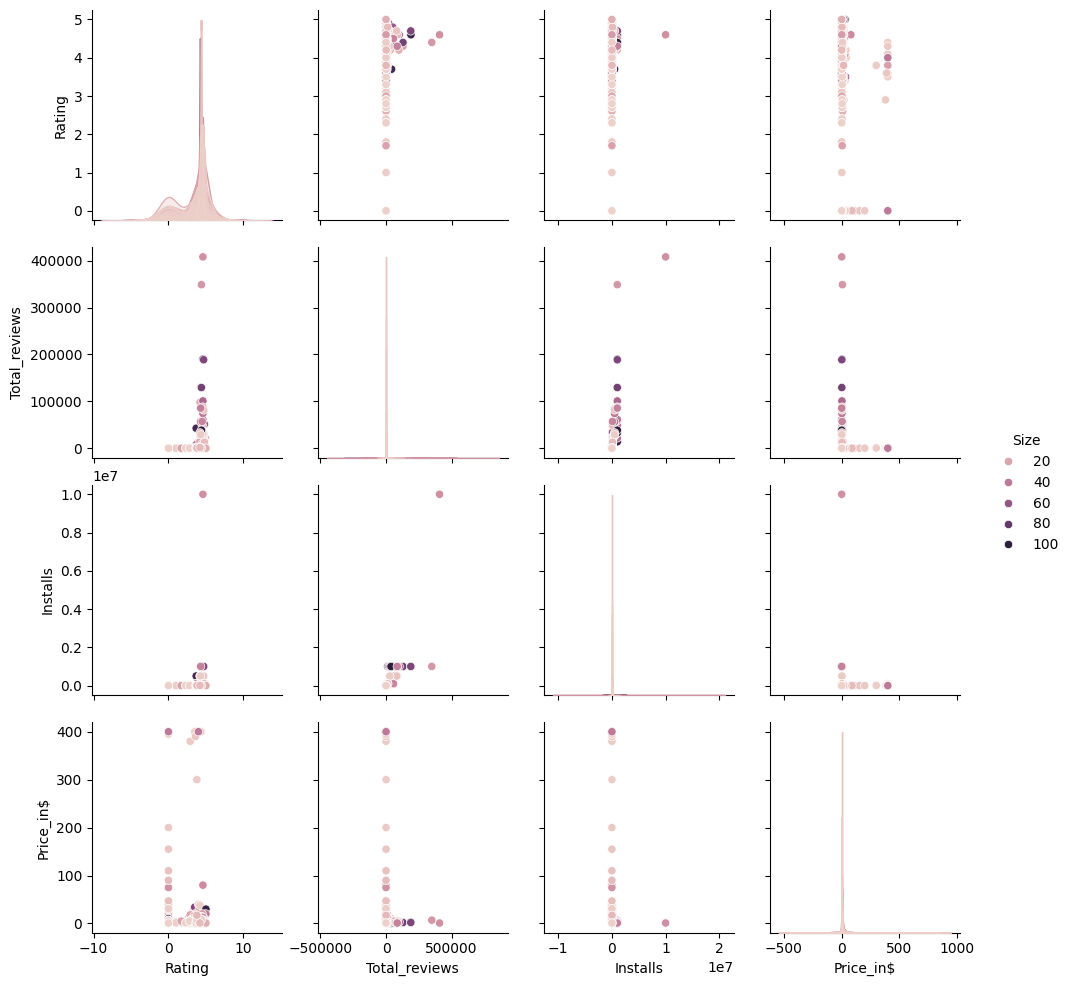

In [38]:
sns.pairplot(paid_app, hue="Size")

##### There is not any Impressive relation between variables of paid apps

##### Q4. which categories have big size apps?

In [39]:
genres_meansize = welltype_app_df.groupby("Genres", as_index=False).agg({'Size': 'mean'})
genres_meansize = genres_meansize.rename(columns={"Size":"mean_size"})
genres_meansize["mean_size"] = genres_meansize["mean_size"].round(2)


In [40]:
genres_meansize.sort_values(by="mean_size", inplace=True, ascending=False)
genres_meansize[:20]

,Genres,mean_size
66,Lifestyle;Pretend Play,100.00
5,Adventure;Education,92.00
8,Arcade;Pretend Play,91.00
61,Health & Fitness;Action & Adventure,83.00
91,Role Playing;Education,83.00
20,Books & Reference;Creativity,77.00
87,Racing;Pretend Play,73.00
86,Racing;Action & Adventure,66.58
92,Role Playing;Pretend Play,66.50
47,Educational;Creativity,65.00


C:\Users\saeed\AppData\Local\Temp\ipykernel_20752\1634343659.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



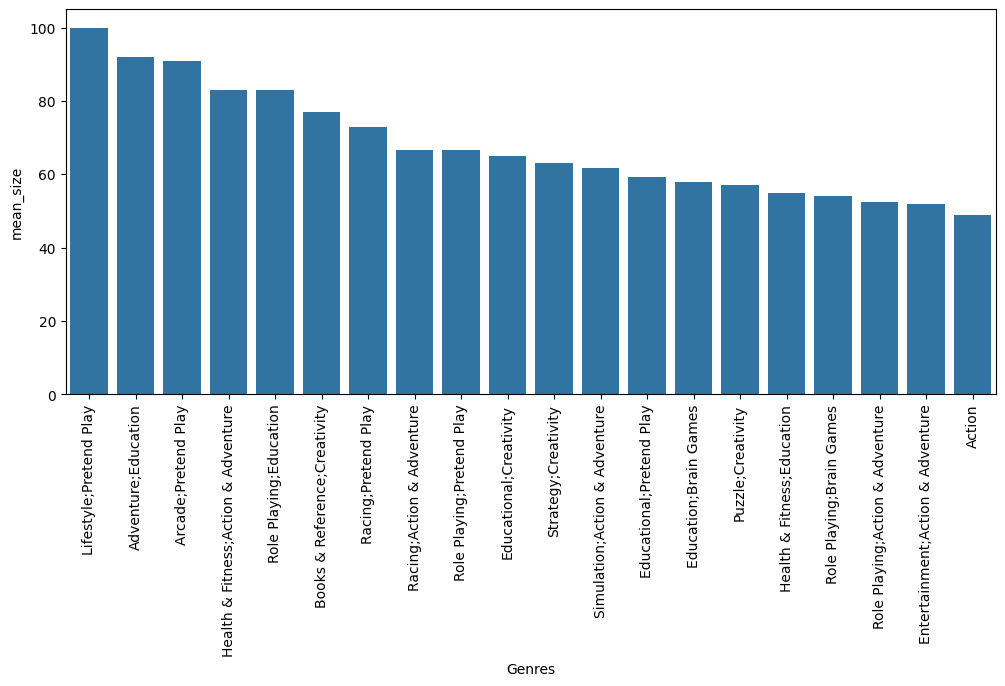

In [41]:
fig, ax = plt.subplots(figsize=(12, 5))
fig =sns.barplot(data=genres_meansize[:20],
        x=genres_meansize["Genres"][:20],
        y=genres_meansize["mean_size"][:20])

fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show()

##### Q.5 Average of reviews for each category

In [42]:
# average of reviews by category

genres_review_average = welltype_app_df.groupby(['Genres'], as_index=False).agg({'Total_reviews': 'mean'})
genres_review_average["Total_reviews"] = genres_review_average["Total_reviews"].round(2)
genres_review_average.head()

,Genres,Total_reviews
0,Action,465716.27
1,Action;Action & Adventure,86033.09
2,Adventure,213113.97
3,Adventure;Action & Adventure,909924.00
4,Adventure;Brain Games,7148.00


In [43]:
genres_review_average = genres_review_average.sort_values(by="Total_reviews", ascending=True)

px.bar(data_frame=genres_review_average,
        x=genres_review_average["Genres"],
        y=genres_review_average["Total_reviews"], width=800)

##### Q.6 what is relationship of size - total_reviews based on categories.

In [44]:
genre_review_size = welltype_app_df.groupby(['Genres'], as_index=False).agg({'Total_reviews': 'mean', "Size":"mean"}).round(2)
genre_review_size["Total_reviews"] = np.log(genre_review_size["Total_reviews"])
genre_review_size

,Genres,Total_reviews,Size
0,Action,13.051332,49.00
1,Action;Action & Adventure,11.362487,42.45
2,Adventure,12.269582,36.39
3,Adventure;Action & Adventure,13.721116,24.76
4,Adventure;Brain Games,8.874588,8.10
...,...,...,...
110,Video Players & Editors,12.112385,15.79
111,Video Players & Editors;Creativity,11.980545,23.00
112,Video Players & Editors;Music & Video,10.591094,19.00
113,Weather,11.100306,12.68


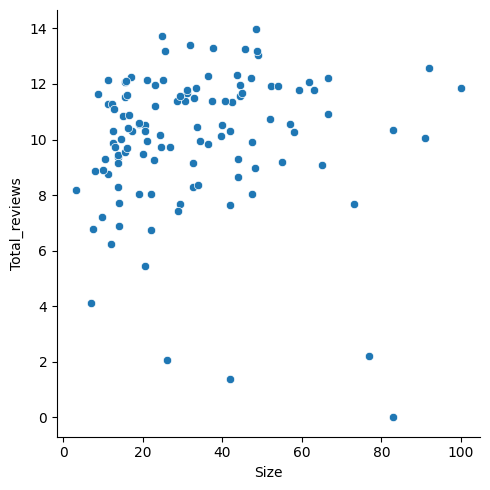

In [45]:
sns.relplot(x="Size", y="Total_reviews", data=genre_review_size)

# 3. Hypothesis Analysis

In [46]:
welltype_app_df

,App,Category,Rating,Total_reviews,Size,Installs,Type,Price_in$,Content_rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,0.0,0,9.6,10,Free,0.0,Everyone,Business
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5,1000,Free,0.0,Everyone,Medical


## List of Null Hypothesis:

### H.1 Most reviewed app's are in Category of Teen.
### H.2 Most negative reviews are for paid applications
### H.3 Most reviewed app's got most positive sentiment 

---------------------------


## 1. **"Most reviewed apps are in the content of Teen."**
   - **Null Hypothesis (\( H_0 \)):** The number of reviews for apps in the Teen content  is not significantly different from the number of reviews for apps in other contents.
   - **Alternative Hypothesis (\( H_1 \)):** The number of reviews for apps in the Teen contents is significantly higher or lower than the number of reviews for apps in other contents.



for this hypothesis testing we consider **alpha = 0.05** 

Lets calculate variance of each group:

In [115]:
teen = welltype_app_df.loc[welltype_app_df["Content_rating"] == "Teen"]
teen_variance  = teen.Total_reviews.var()

non_teen = welltype_app_df.loc[welltype_app_df["Content_rating"] != "Teen"]
non_teen_variance  = non_teen.Total_reviews.var()


In [116]:
content_rating = welltype_app_df.groupby(by=["Content_rating"], as_index=False).agg({"App":"count", "Total_reviews":"sum"})
content_rating

,Content_rating,App,Total_reviews
0,Adults only 18+,2,74022
1,Everyone,6919,600707120
2,Everyone 10+,273,172670512
3,Mature 17+,340,35554168
4,Teen,898,208621081
5,Unrated,2,1187


## add up all values in other contents 

In [117]:

non_teen_content = content_rating.loc[content_rating["Content_rating"] != "Teen"]
non_teen_content["Total_reviews"] = non_teen_content["Total_reviews"].astype("int64")
non_teen_content = non_teen_content.select_dtypes(include="number").sum(axis=0)
non_teen_content = non_teen_content.to_frame().T
non_teen_content.insert(loc=0, column="Content_rating" , value="non_teen")
non_teen_content


C:\Users\saeed\AppData\Local\Temp\ipykernel_20752\3217820365.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Content_rating,App,Total_reviews
0,non_teen,7536,809007009


In [118]:
teen_non_teen = pd.concat([content_rating.loc[content_rating["Content_rating"] == "Teen"], non_teen_content ])
teen_non_teen["mean"] = teen_non_teen["Total_reviews"] / teen_non_teen["App"]
teen_non_teen["variance"] = [teen_variance, non_teen_variance]
teen_non_teen

,Content_rating,App,Total_reviews,mean,variance
4,Teen,898,208621081,232317.462138,9.973500e+11
0,non_teen,7536,809007009,107352.310111,8.606051e+11


### Now we have our dataframe let do our hypothesis testing: 
**we will do a comparison for mean of reviews for teen and non-teen apps**

### Degrees of freedom:

-----------------------------------

## 2. **"Most negative reviews are for paid applications."**
   - **Null Hypothesis (\( H_0 \)):** The proportion of negative reviews for paid applications is not significantly different from the proportion of negative reviews for free applications.
   - **Alternative Hypothesis (\( H_1 \)):** The proportion of negative reviews for paid applications is significantly higher or lower than the proportion of negative reviews for free applications.


------------------------------------------


## 3. **"Most reviewed apps have the most positive sentiment."**
   - **Null Hypothesis (\( H_0 \)):** The sentiment scores for the most reviewed apps are not significantly different from the sentiment scores for other apps.
   - **Alternative Hypothesis (\( H_1 \)):** The sentiment scores for the most reviewed apps are significantly higher or lower than the sentiment scores for other apps.
